In [160]:
import pandas as pd
import seaborn as sns
from google.colab import drive
from matplotlib import pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
df_2 = pd.read_csv("/content/drive/MyDrive/Organizacion De Datos/Trabajo_practico/dengue_features_train.csv")
df_3 = pd.read_csv("/content/drive/MyDrive/Organizacion De Datos/Trabajo_practico/dengue_labels_train.csv")
nuevo_df = pd.merge(df_2, df_3, how= "inner")

In [162]:
nuevo_df.rename(columns = {'city':'ciudad'}, inplace = True)

In [163]:
nuevo_df.head(3)

,ciudad,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4


In [164]:
nuevo_df = nuevo_df[nuevo_df["year"]>= 2000]

In [165]:
agrupado = nuevo_df.groupby(["ciudad","year"]).agg({"total_cases":["sum"]})

In [166]:
agrupado = agrupado.reset_index()
agrupado

,ciudad,year,total_cases
,,,sum
0,iq,2000,4
1,iq,2001,14
2,iq,2002,704
3,iq,2003,114
4,iq,2004,638
5,iq,2005,311
6,iq,2006,436
7,iq,2007,365
8,iq,2008,801


Text(0, 0.5, 'Cantidad de casos')

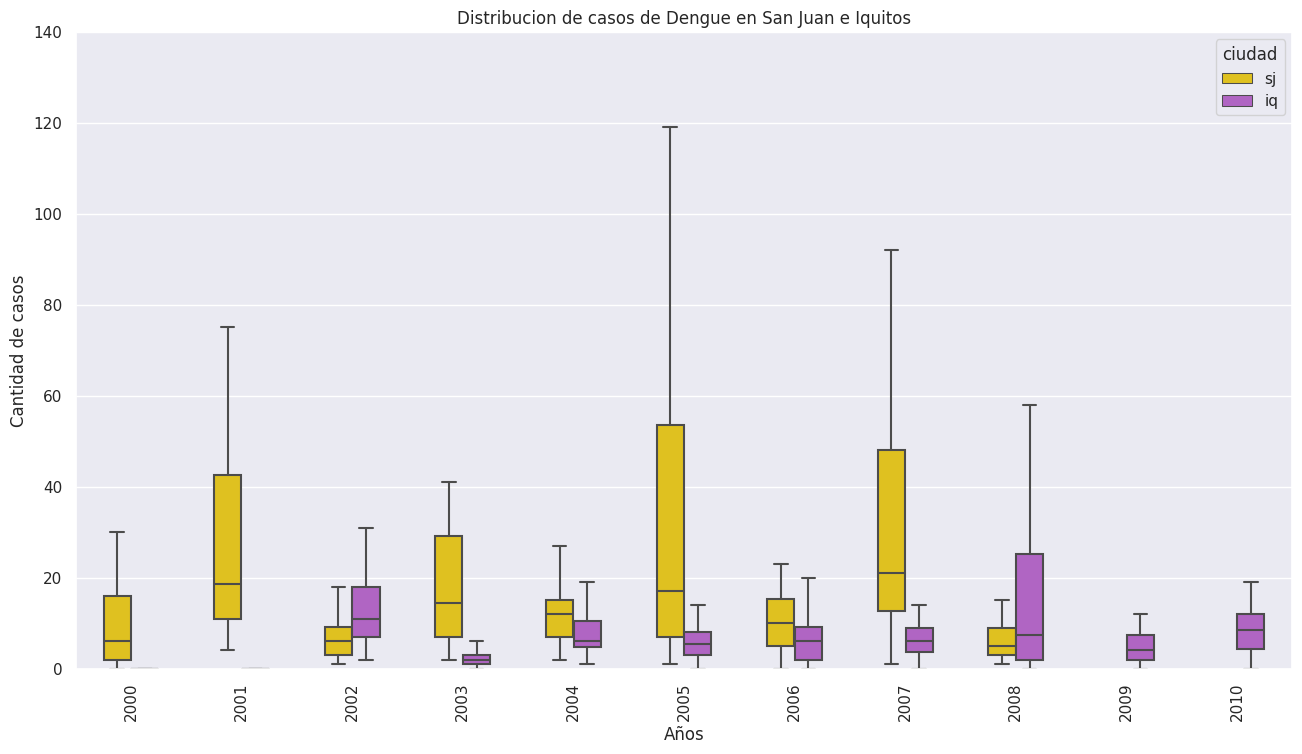

In [182]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.boxplot(data=nuevo_df, x="year",y="total_cases", hue="ciudad",palette=["Gold","MediumOrchid"],width=0.5,fliersize=False,)
plt.ylim(0, 140)
plt.xticks(rotation=90)
plt.title("Distribucion de casos de Dengue en San Juan e Iquitos")
plt.xlabel('Años', fontsize = 12)
plt.ylabel('Cantidad de casos', fontsize = 12) 
